# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [54]:
#done
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
df=pd.merge(study_results,mouse_metadata,how='inner',on=['Mouse ID'])
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
#done
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
#done
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupmask=df.duplicated(subset=['Mouse ID','Timepoint'])
df[dupmask]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
#done
# Optional: Get all the data for the duplicate mouse ID. 
df[(df['Mouse ID']=='g989')] #shows duplicates by mouse id and timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#done
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#this would drop just the duplicated lines
# dfclean=df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first',ignore_index=False)
# dfclean[(dfclean['Mouse ID']=='g989')]
# dfclean.head()

#...but we want to drop the mouse entirely
dfclean=df[df['Mouse ID']!='g989']
dfclean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
#done
# Checking the number of mice in the clean DataFrame.
dfclean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
#done
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
dfmeantumorvolume=df.groupby('Drug Regimen').mean(numeric_only=True)['Tumor Volume (mm3)']
dfmediantumorvolume=df.groupby('Drug Regimen').median(numeric_only=True)['Tumor Volume (mm3)']
dfvariancetumorvolume=df.groupby('Drug Regimen').var(numeric_only=True)['Tumor Volume (mm3)']
dfstdtumorvolume=df.groupby('Drug Regimen').std(numeric_only=True)['Tumor Volume (mm3)']
dfsemtumorvolume=df.groupby('Drug Regimen').sem(numeric_only=True)['Tumor Volume (mm3)']

dfsummary=pd.DataFrame({
    'Mean Tumor Volume':dfmeantumorvolume,
    'Median Tumor Volume':dfmediantumorvolume,
    'Variance Tumor Volume':dfvariancetumorvolume,
    'Tumor Volume Std. Dev.':dfstdtumorvolume,
    'Tumor Volume Std. Err.':dfsemtumorvolume,
})
dfsummary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#done
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
dfstat=df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
dfstat=dfstat.style.set_caption("Tumor Volume (mm3)")
dfstat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

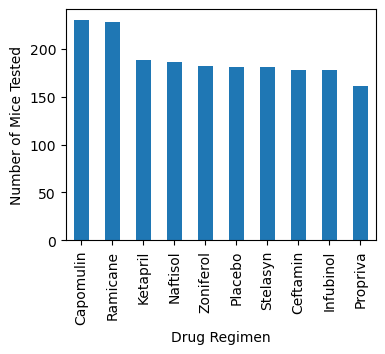

In [9]:
#done
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using Pandas.
dftpdr=df.groupby(['Drug Regimen']).count()['Timepoint']
dftpdr=dftpdr.sort_values(ascending=False)
ax=dftpdr.plot(kind='bar',figsize=(4,3))
ax.set_ylabel('Number of Mice Tested')

<BarContainer object of 10 artists>

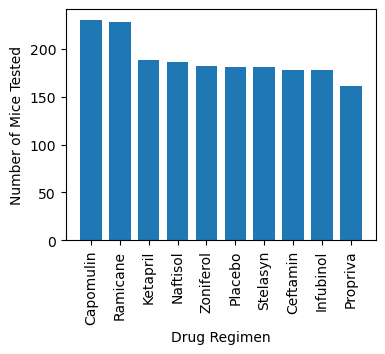

In [10]:
#done
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using pyplot.
dftpdr=df.groupby(['Drug Regimen']).count()['Timepoint']
dftpdr=dftpdr.sort_values(ascending=False)
#
fig,ax=plt.subplots(figsize=(4,3))
ax.set_ylabel('Number of Mice Tested')
ax.set_xlabel('Drug Regimen')
plt.xticks(rotation=90)
ax.bar(dftpdr.index,dftpdr.values,.75)

Text(0, 0.5, 'Sex')

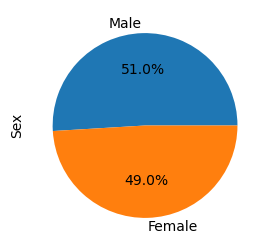

In [11]:
#done
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dfsx1=dfclean.groupby(['Sex']).count()['Mouse ID']
dfsx1=dfsx1.sort_values(ascending=False)
ax1=dfsx1.plot(kind='pie',autopct='%1.1f%%',figsize=(5,3))
ax1.set_ylabel('Sex')

([<matplotlib.patches.Wedge at 0x17c42419720>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

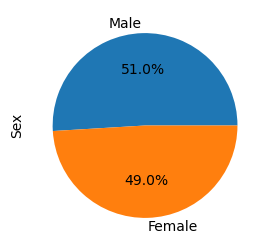

In [12]:
# done
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dfsx2=dfclean.groupby(['Sex']).count()['Mouse ID']
dfsx2=dfsx2.sort_values(ascending=False)
fig,ax=plt.subplots(figsize=(4,3))
ax.set_ylabel('Sex')
plt.pie(dfsx2,labels=dfsx2.index,autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [13]:
# add to help visualize the df...
dfclean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
dffinal=dfclean.copy()
dffinal.sort_values(['Mouse ID','Timepoint'])
dffinal=dffinal.groupby(['Mouse ID']).max()#seems to work
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
dffinal=pd.merge(dfclean,dffinal,how='inner',on=['Mouse ID','Timepoint'])
# dfmerge
dffinal.rename(columns={'Tumor Volume (mm3)_x':'Final Tumor Volume (mm3)',
                       'Drug Regimen_x':'Drug Regimen',
                       },inplace=True)
dffinal=dffinal.loc[:,['Mouse ID','Drug Regimen','Final Tumor Volume (mm3)']]
# dffinal

In [75]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=dffinal['Drug Regimen'].unique()
# print(type(treatments))
# treatments=
treatments.sort()
treatments
# Create empty list to fill with tumor vol data (for plotting)
tumorvoldata={}
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# treatment='Capomulin'


for treatment in treatments:
    datadf=dffinal.loc[dffinal['Drug Regimen']==treatment,:]
    quartiles=datadf.quantile([.25,.5,.75],numeric_only=True)
    lowerq=quartiles.loc[0.25,:]['Final Tumor Volume (mm3)']
    upperq=quartiles.loc[0.75,:]['Final Tumor Volume (mm3)']
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset=datadf['Final Tumor Volume (mm3)']
    # add subset
    tumorvoldata[treatment]=subset
    # Determine outliers using upper and lower bounds
    outliers=datadf[(datadf['Final Tumor Volume (mm3)']>upper_bound) \
                  | (datadf['Final Tumor Volume (mm3)']<lower_bound)] \
                    ['Final Tumor Volume (mm3)']
    message=f"{treatment}'s potential outliers: {outliers}"
    print(message)

Capomulin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 29    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Ketapril's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Naftisol's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Placebo's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Stelasyn's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Zoniferol's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


In [59]:
# np.random.randn(10,4)

     Capomulin  Ceftamin  Infubinol   Ketapril  Naftisol  Placebo  Propriva  \
0    38.982878       NaN        NaN        NaN       NaN      NaN       NaN   
1          NaN       NaN        NaN  45.000000       NaN      NaN       NaN   
2          NaN       NaN        NaN  71.905117       NaN      NaN       NaN   
3          NaN       NaN        NaN  49.783419       NaN      NaN       NaN   
4          NaN       NaN        NaN  62.175705       NaN      NaN       NaN   
..         ...       ...        ...        ...       ...      ...       ...   
243  34.455298       NaN        NaN        NaN       NaN      NaN       NaN   
244  47.685963       NaN        NaN        NaN       NaN      NaN       NaN   
245  33.329098       NaN        NaN        NaN       NaN      NaN       NaN   
246  30.485985       NaN        NaN        NaN       NaN      NaN       NaN   
247  28.430964       NaN        NaN        NaN       NaN      NaN       NaN   

     Ramicane  Stelasyn  Zoniferol  
0         NaN 

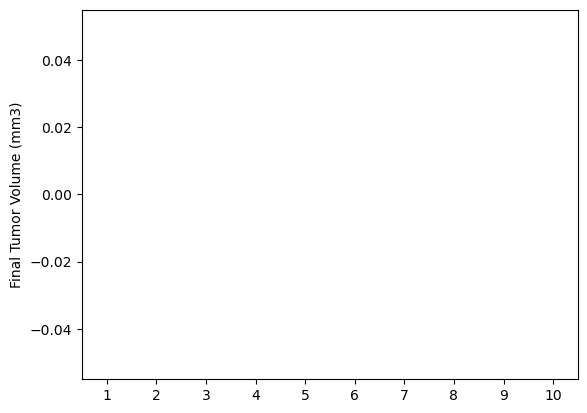

In [77]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
dfboxplot=pd.DataFrame(tumorvoldata)
print(dfboxplot)
fig1, ax1 = plt.subplots()
# ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(dfboxplot)
plt.show()

## Line and Scatter Plots

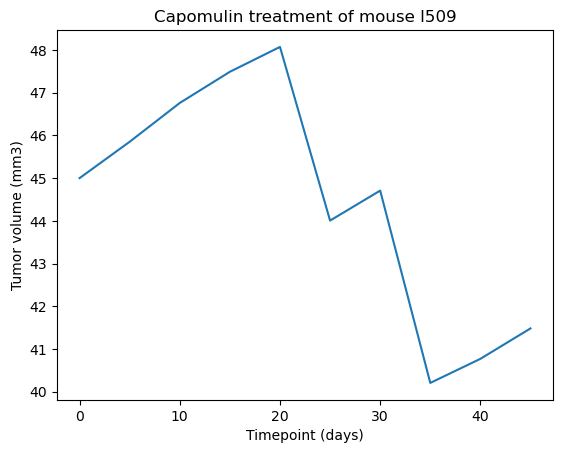

In [17]:
# done
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#using mouse i509 so i can match the example in starter code
#df[(df['Drug Regimen']=='Capomulin')]['Mouse ID'].unique()
dfline=df[(df['Mouse ID']=='l509')].loc[:,['Tumor Volume (mm3)','Timepoint']]
plot=dfline.plot.line(x='Timepoint',
                 y='Tumor Volume (mm3)',title='Capomulin treatment of mouse l509',
                 xlabel='Timepoint (days)',
                 ylabel='Tumor volume (mm3)',
                 legend=False,grid=False,
                )
plot.set_facecolor('w')

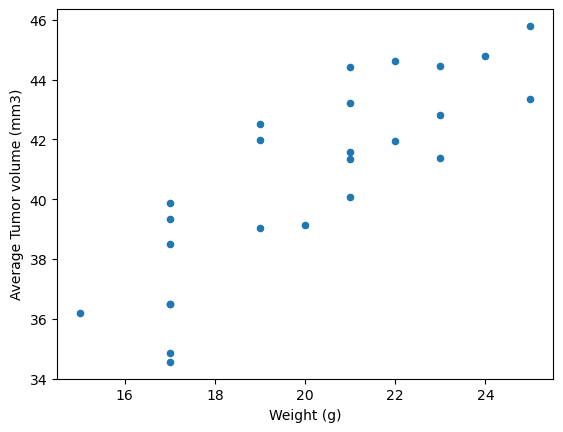

In [18]:
# done
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
dfscatter=df[(df['Drug Regimen']=='Capomulin')].groupby('Mouse ID').mean(numeric_only=True).loc[:,['Tumor Volume (mm3)','Weight (g)']]
plot=dfscatter.plot.scatter(
                x='Weight (g)',
                y='Tumor Volume (mm3)',
                #title='Capomulin treatment of mouse l509',
                xlabel='Weight (g)',
                ylabel='Average Tumor volume (mm3)',
                legend=False,grid=False,
                )
plot.set_facecolor('w')

## Correlation and Regression

<Axes: title={'center': 'The correlation between mouse weight and the average tumor volume is 0.84'}, xlabel='Weight (g)', ylabel='Average Tumor volume (mm3)'>

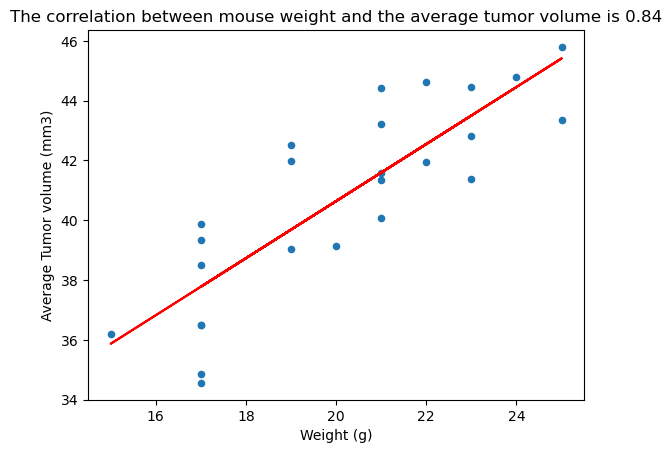

In [19]:
# done
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
dfvolumeweight=df[(df['Drug Regimen']=='Capomulin')].groupby('Mouse ID').mean(numeric_only=True).loc[:,['Tumor Volume (mm3)','Weight (g)']]
lr=st.linregress(y=dfvolumeweight['Tumor Volume (mm3)'],x=dfvolumeweight['Weight (g)'])
dfvolumeweight['lr']=lr[0]*dfvolumeweight['Weight (g)']+lr[1]
phrase='The correlation between mouse weight and the average tumor volume is %s'%round(lr[2],2)
plot2=dfvolumeweight.plot.scatter(
                x='Weight (g)',
                y='Tumor Volume (mm3)',
                title=phrase,
                xlabel='Weight (g)',
                ylabel='Average Tumor volume (mm3)',
                legend=False,grid=False,
                )
plot2.set_facecolor('w')
dfvolumeweight.plot(
                x='Weight (g)',
                y='lr',
                ax=plot2,
                color='red',
                legend=False,
)